# Machine Learning Task

Importing,  
numpy for data preprocessing,  
keras for neural network model,  
matplotlib.pyplot for plotting the epochs vs validation accuracy graph,  
sklearn for KFold Cross Validation.

Seed value for numpy.random is also given to maintain consistency in results obtained after training which helps in tuning the hyperparameters.


In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, PReLU
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold

np.random.seed(1337)

Using TensorFlow backend.


To preprocess the data by normalizing and also shuffling if training data is passed to this function.

Splitting the test data into validation and test sets. Each of these sets contain half of each class' data which comes out to be 50 data points for one set since total test data is 100. Also, not shuffling the test data as it wil give inconsistent results.

In [2]:
def preprocess_data(data):

    # Combining the data of two classes
    class_0 = np.append(data['0'], np.zeros((data['0'].shape[0], 1)), axis=1)
    class_1 = np.append(data['1'], np.ones((data['1'].shape[0], 1)), axis=1)
    combined = np.append(class_0, class_1, axis=0)

    # Shuffling the data in place
    np.random.shuffle(combined)

    # Separating Ys from Xs and normalizing Xs
    x = combined[:, :-1]
    x = (x - x.mean(axis=0)) / x.std(axis=0)
    y = combined[:, -1]

    return x, y

Loading the training and testing data from .npz file.

In [3]:
input_data = np.load('data.npz', allow_pickle=True)

train = input_data['training_input'][()]
test = input_data['test_input'][()]

Getting the preprocessed data sets.

In [4]:
x_train, y_train = preprocess_data(train)
x_test, y_test = preprocess_data(test)

Declaring the batch size and number of epochs.

In [5]:
batch_size = 5
epochs = 50

Creating the NN model here.

Now, here I am using a Neural Network model since it can be used as a universal function approximator and scales quite well even when large amounts of data is used. In addition to that I also plan to create a Quantum Neural Network in the project, hence NN was chosen for this task.

K-Fold Cross Validation was used since the amount of training data we have is less, we need to check if our model is overfitting or not.

The model parameters were chosen as:  
number of hidden layer: 1; we increase the number of hidden layers when more complex patterns are to be identified in the data. In this case the patterns required for classification are simple enough to be mapped to a single hidden layer, thus only 1 hidden layer was used.  

number of neurons in the hidden layer: 8; as a rule of thumb I use the hidden layer neurons' number as less than twice the input size which in this case was 2 * 5. After that we need to prevent our model from overfitting and underfitting the data. Too many neurons will have so much information processing capacity that it will try to "memorize" the data if small number of samples are given. Too few neurons will not have sufficient information processing capacity and will cause underfitting.

activation function for hidden layer: PReLU; we know that ReLU has proven to be the standard activation function and it scales well too, but since our input data is normalized and then given to the network, it also has negative values. Those negative values would've caused the neuron to die if ReLU was used. Parameterized ReLU solves that problem as it allows the model to learn what fraction of negative values should be activated, thus preventing the dying ReLU problem.

activation function for output layer: sigmoid; since this is a binary classification problem, the sigmoid activation is a reasonable choice as it provides a value between 0 and 1 which can be interpreted as a probability when combined with the binary cross entropy loss.

loss function: binary cross entropy; for binary classification this was a reasonable choice along with sigmoid output layer activation.

optimizer: adam; it has low memory requirements and works well without much tuning of the hyperparamters.

batch size and epoch: 5 and 50; increasing the epochs after a certain point will make our model overfit to the training samples. batch_size is there to prevent that and allow appropriate learning to occur after each weight update iteration. These values were decided upon after many trials.

number of k-fold splits: 5; increasing the number of splits will mean lower amount of validation data and vice-versa. So a value was reached after experimenting multiple times.

In [6]:
kfold = StratifiedKFold(n_splits=5)
loss = []

for train, val in kfold.split(x_train, y_train):

    model = Sequential()
    model.add(Dense(8, input_shape=x_train[0].shape))
    model.add(PReLU())
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    hist = model.fit(x_train[train], y_train[train], batch_size=batch_size, epochs=epochs, validation_data=(x_train[val], y_train[val]))
    loss.append(hist.history['val_loss'])

# For creating the K-FOLD CV graph with epochs to check for overfit
avg_losses = np.mean(loss, axis=0)

curacy: 0.7125 - val_loss: 0.6193 - val_accuracy: 0.8000
Epoch 12/50
80/80 [==============================] - 0s 185us/step - loss: 0.5996 - accuracy: 0.7500 - val_loss: 0.6054 - val_accuracy: 0.8500
Epoch 13/50
80/80 [==============================] - 0s 222us/step - loss: 0.5901 - accuracy: 0.7625 - val_loss: 0.5912 - val_accuracy: 0.8500
Epoch 14/50
80/80 [==============================] - 0s 177us/step - loss: 0.5803 - accuracy: 0.8000 - val_loss: 0.5772 - val_accuracy: 0.8500
Epoch 15/50
80/80 [==============================] - 0s 196us/step - loss: 0.5707 - accuracy: 0.8000 - val_loss: 0.5656 - val_accuracy: 0.8500
Epoch 16/50
80/80 [==============================] - 0s 185us/step - loss: 0.5622 - accuracy: 0.8000 - val_loss: 0.5537 - val_accuracy: 0.8500
Epoch 17/50
80/80 [==============================] - 0s 176us/step - loss: 0.5530 - accuracy: 0.8000 - val_loss: 0.5416 - val_accuracy: 0.8500
Epoch 18/50
80/80 [==============================] - 0s 180us/step - loss: 0.5445 - a

Plotting the graph and training the model now.

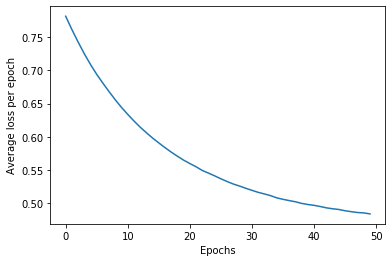

In [7]:
plt.plot(np.arange(epochs), avg_losses)
plt.xlabel("Epochs")
plt.ylabel("Average loss per epoch")
plt.show()

In [8]:
model = Sequential()
model.add(Dense(8, input_shape=x_train[0].shape))
model.add(PReLU())
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs)

Epoch 1/50
100/100 [==============================] - 0s 939us/step - loss: 0.8583 - accuracy: 0.2200
Epoch 2/50
100/100 [==============================] - 0s 175us/step - loss: 0.8268 - accuracy: 0.2500
Epoch 3/50
100/100 [==============================] - 0s 178us/step - loss: 0.8011 - accuracy: 0.2800
Epoch 4/50
100/100 [==============================] - 0s 147us/step - loss: 0.7766 - accuracy: 0.3000
Epoch 5/50
100/100 [==============================] - 0s 166us/step - loss: 0.7547 - accuracy: 0.3100
Epoch 6/50
100/100 [==============================] - 0s 148us/step - loss: 0.7358 - accuracy: 0.3600
Epoch 7/50
100/100 [==============================] - 0s 151us/step - loss: 0.7159 - accuracy: 0.4700
Epoch 8/50
100/100 [==============================] - 0s 162us/step - loss: 0.6996 - accuracy: 0.5600
Epoch 9/50
100/100 [==============================] - 0s 167us/step - loss: 0.6834 - accuracy: 0.6200
Epoch 10/50
100/100 [==============================] - 0s 150us/step - loss: 0.669

Evaluating the model on the test set.

In [9]:
score = model.evaluate(x_test, y_test)

print("Test Accuracy: ", score[1] * 100, "%")

32/100 [========>.....................] - ETA: 0s